In [1]:
#Import necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, Column, Integer, Float, String, ForeignKey, and_
from sqlalchemy_utils import database_exists, create_database
import seaborn as sns

In [2]:
#Vacation Date range
st_date = '2017-04-29'
end_Date = '2017-05-13'


In [3]:
#build engine
engine = create_engine('sqlite:///hawaii.sqlite')
if not database_exists(engine.url):
    create_database(engine.url)

conn = engine.connect()

In [4]:
Base = automap_base()

#Create metadata
Base.metadata.create_all(engine)

#Create Session
session = Session(bind=engine)

In [5]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [6]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [7]:
#Get maximum date from data
max_dt= session.query(func.max(Measurements.date)).all()
print(max_dt)

[('2017-08-23',)]


In [8]:
#Get DataFrame
df_meas = pd.read_sql("SELECT date, prcp FROM measurements WHERE date between '2016-08-24' and '2017-08-23'", conn, \
                     index_col='date')
df_meas.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


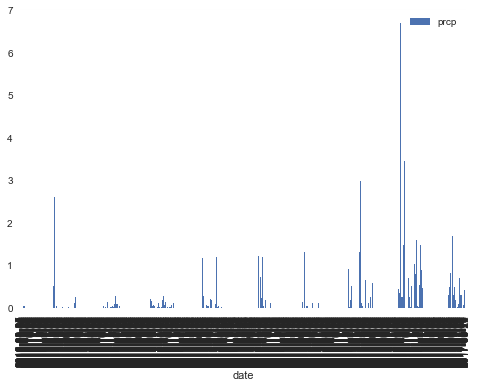

In [9]:
#Plot dataframe

#df_meas.reset_index()
df_meas.plot.bar(x=df_meas.index,y='prcp')
plt.show()

In [10]:
df_meas.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [11]:
#total station Count
df_station_count = pd.read_sql("SELECT distinct station FROM measurements",conn)
len(df_station_count['station'])

9

In [12]:
#Most active stations - WAIHEE 837.5, HI US has the highest # of occurrences
df_station_active = pd.read_sql("SELECT station, count(*) as Count FROM measurements GROUP BY station ORDER BY Count Desc",conn)
df_station_active

,station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [13]:
#df USC00519281, station with most observations
df_station_most = pd.read_sql("SELECT date, tobs FROM measurements WHERE date between '2016-08-24' and '2017-08-23' and station ='USC00519281' ", conn, \
                     index_col='date')
df_station_most.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


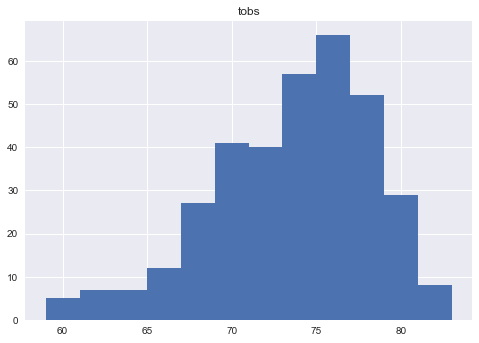

In [14]:
df_station_most.hist(bins=12)
plt.show()